# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [196]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [30]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


In [31]:
cities

['vilyuchinsk',
 'qui nhon',
 'punta arenas',
 'hangu',
 'hihifo',
 'wailua homesteads',
 'port-aux-francais',
 'damilag',
 'waitangi',
 'jumla',
 'enewetak',
 'grytviken',
 'anadyr',
 'shache',
 'touros',
 'vila velha',
 'ushuaia',
 'caleta de carquin',
 'edinburgh of the seven seas',
 'east london',
 'fredericton',
 'utrik',
 'merizo village',
 'olonkinbyen',
 'bilibino',
 'puerto natales',
 'invercargill',
 'papatowai',
 'suyan',
 'bredasdorp',
 'west island',
 'puerto baquerizo moreno',
 'kharkhorin',
 'vorgashor',
 'vadso',
 'adamstown',
 'barrancabermeja',
 'puerto quijarro',
 'guaruja',
 'antsiranana',
 'wenling',
 'fale old settlement',
 "port saint john's",
 'albany',
 'alice springs',
 'presidente medici',
 'sao vicente',
 'padre bernardo',
 'ilulissat',
 'el calafate',
 'rabaul',
 'meulaboh',
 'blackmans bay',
 'pisco',
 'paranaiba',
 'tabas',
 'galliano',
 'aasiaat',
 'taltal',
 'vorozhba',
 'sinabang',
 'lata',
 'kodiak',
 'puerto deseado',
 'mutoko',
 'atafu village',
 't

In [76]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Create endpoint URL with each city, testing it with 2nd city in list
city_url = url + "appid=" + weather_api_key + "&q=" + "jumla"
response = requests.get(city_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 29.2747, 'lon': 82.1838},
 'dt': 1691299001,
 'id': 1283285,
 'main': {'feels_like': 295.47,
          'grnd_level': 772,
          'humidity': 77,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 295.2,
          'temp_max': 295.2,
          'temp_min': 295.2},
 'name': 'Jumla',
 'sys': {'country': 'NP', 'sunrise': 1691279645, 'sunset': 1691328021},
 'timezone': 20700,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 276, 'gust': 1.8, 'speed': 2.37}}


In [77]:
#testing retrival of data
response["main"]["temp"]
response["sys"]["country"]
response["weather"][0]["description"]
response["clouds"]["all"]
response["coord"]["lat"]
response["wind"]["speed"]

2.37

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [86]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
#enumerate tracks the number of iterations and you can use as index
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    # % 50 is taking to remainder of dividing i by 50. when 50 iterations have happened,set_count adds 1. Groups cities into groups of 50
    #record_count is counting # of cities in each group and resets for each new group
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response["weather"][0]["description"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

         # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
        # Append the City information into city_data list
        #I had to put this section below the except statment and put it on the same indent line to capture all the data
    city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

   
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vilyuchinsk
Processing Record 2 of Set 1 | qui nhon
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | hangu
Processing Record 5 of Set 1 | hihifo
City not found. Skipping...
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | damilag
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | jumla
Processing Record 11 of Set 1 | enewetak
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | shache
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | vila velha
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | caleta de carquin
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | fredericton
Processing Rec

Processing Record 36 of Set 4 | kurumul
City not found. Skipping...
Processing Record 37 of Set 4 | dalandzadgad
Processing Record 38 of Set 4 | korla
Processing Record 39 of Set 4 | rio grande
Processing Record 40 of Set 4 | ararat
Processing Record 41 of Set 4 | nkurenkuru
City not found. Skipping...
Processing Record 42 of Set 4 | bida
Processing Record 43 of Set 4 | fedorovka
Processing Record 44 of Set 4 | cambria
Processing Record 45 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 46 of Set 4 | renqiu
Processing Record 47 of Set 4 | lebu
Processing Record 48 of Set 4 | kailua-kona
Processing Record 49 of Set 4 | reggane
Processing Record 0 of Set 5 | copala
Processing Record 1 of Set 5 | allapalli
Processing Record 2 of Set 5 | antonio enes
Processing Record 3 of Set 5 | berdigestyakh
Processing Record 4 of Set 5 | cidreira
Processing Record 5 of Set 5 | jamestown
Processing Record 6 of Set 5 | pampierstad
Processing Record 7 of Set 5 | happy valley-goose bay


Processing Record 31 of Set 8 | esmeraldas
Processing Record 32 of Set 8 | kharan
Processing Record 33 of Set 8 | muntilan
Processing Record 34 of Set 8 | johi
Processing Record 35 of Set 8 | tarawa
Processing Record 36 of Set 8 | kodoli
Processing Record 37 of Set 8 | north bay
Processing Record 38 of Set 8 | curup
Processing Record 39 of Set 8 | marudi
City not found. Skipping...
Processing Record 40 of Set 8 | strathmore
Processing Record 41 of Set 8 | sefwi wiawso
City not found. Skipping...
Processing Record 42 of Set 8 | porto novo
Processing Record 43 of Set 8 | djenne
Processing Record 44 of Set 8 | westport
Processing Record 45 of Set 8 | sawakin
Processing Record 46 of Set 8 | sur
Processing Record 47 of Set 8 | kalmunai
Processing Record 48 of Set 8 | ambodivoara
City not found. Skipping...
Processing Record 49 of Set 8 | nelson bay
Processing Record 0 of Set 9 | illapel
Processing Record 1 of Set 9 | peace river
Processing Record 2 of Set 9 | quellon
Processing Record 3 of 

Processing Record 19 of Set 12 | seven pagodas
Processing Record 20 of Set 12 | tutoia
Processing Record 21 of Set 12 | baihe
Processing Record 22 of Set 12 | fukuecho
Processing Record 23 of Set 12 | carbonear
Processing Record 24 of Set 12 | port-vila
Processing Record 25 of Set 12 | huarmey
Processing Record 26 of Set 12 | genhe
Processing Record 27 of Set 12 | hotan
Processing Record 28 of Set 12 | altamont
Processing Record 29 of Set 12 | manta
Processing Record 30 of Set 12 | marshall
Processing Record 31 of Set 12 | port hedland
Processing Record 32 of Set 12 | bontang
Processing Record 33 of Set 12 | makokou
Processing Record 34 of Set 12 | arawa
Processing Record 35 of Set 12 | pagar alam
Processing Record 36 of Set 12 | n'zeto
Processing Record 37 of Set 12 | anjala
Processing Record 38 of Set 12 | hailey
Processing Record 39 of Set 12 | cataguases
Processing Record 40 of Set 12 | paharpur
Processing Record 41 of Set 12 | loreto
-----------------------------
Data Retrieval Co

In [88]:
len(city_data)

592

In [89]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [90]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vilyuchinsk,52.9306,158.4028,294.30,67,32,1.58,RU,1691299262
1,qui nhon,13.7667,109.2333,307.48,49,70,6.46,VN,1691299262
2,punta arenas,-53.1500,-70.9167,270.94,70,43,12.46,CL,1691299263
3,hangu,39.2489,117.7892,302.17,50,24,1.84,CN,1691299265
4,hihifo,39.2489,117.7892,302.17,50,24,1.84,CN,1691299265


In [92]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [95]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,294.30,67,32,1.58,RU,1691299262
1,qui nhon,13.7667,109.2333,307.48,49,70,6.46,VN,1691299262
2,punta arenas,-53.1500,-70.9167,270.94,70,43,12.46,CL,1691299263
3,hangu,39.2489,117.7892,302.17,50,24,1.84,CN,1691299265
4,hihifo,39.2489,117.7892,302.17,50,24,1.84,CN,1691299265


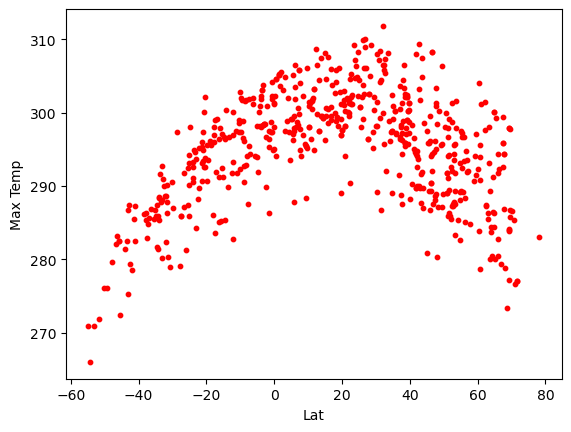

In [250]:

Fig1 = city_data_df.plot.scatter("Lat","Max Temp", s=10, c="red")
plt.savefig("../output_data/Fig1.png")

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

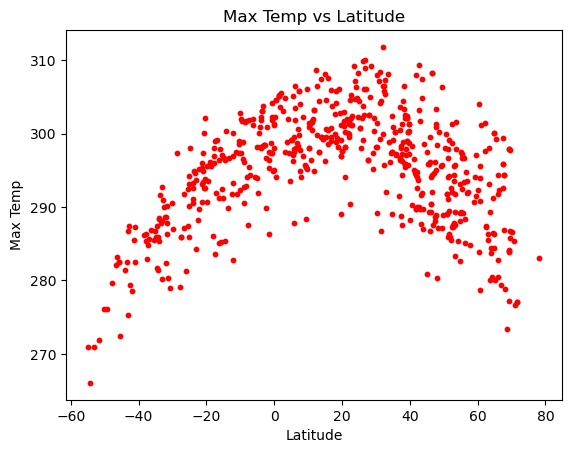

In [251]:
# Build scatter plot for latitude vs. temperature
#plt.figure()
fig = city_data_df.plot.scatter("Lat","Max Temp", s=10, c="red",title="Max Temp vs Latitude",xlabel="Latitude")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

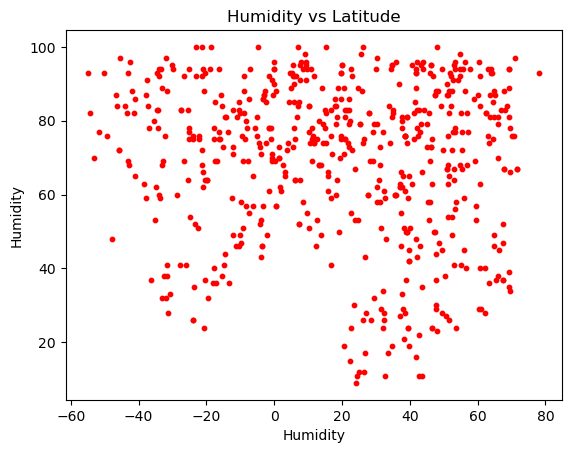

In [252]:
# Build the scatter plots for latitude vs. humidity
fig2 = city_data_df.plot.scatter("Lat","Humidity", s=10, c="red",title="Humidity vs Latitude",xlabel="Humidity")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

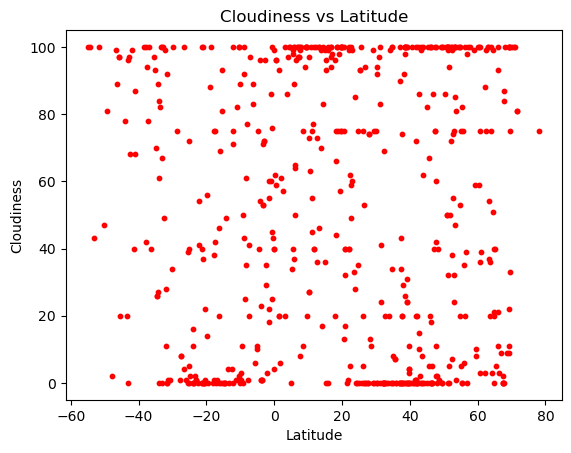

In [253]:
# Build the scatter plots for latitude vs. cloudiness
fig = city_data_df.plot.scatter("Lat","Cloudiness", s=10, c="red",title="Cloudiness vs Latitude",xlabel="Latitude")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

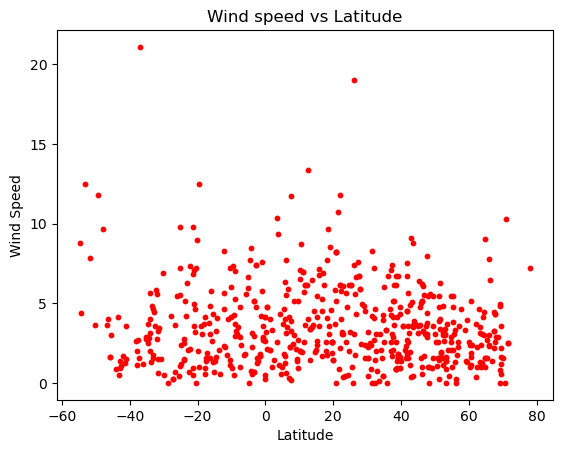

In [254]:
# Build the scatter plots for latitude vs. wind speed
#fig1, ax = plt.subplots()
fig = city_data_df.plot.scatter("Lat","Wind Speed", s=10, c="red",title="Wind speed vs Latitude",xlabel="Latitude")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [142]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
#plotting to make sure all latitudes>0
#northern_hemi_df.plot.scatter("Lat","Wind Speed", s=10, c="red",title="Wind speed vs Latitude",xlabel="Latitude")

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,294.30,67,32,1.58,RU,1691299262
1,qui nhon,13.7667,109.2333,307.48,49,70,6.46,VN,1691299262
3,hangu,39.2489,117.7892,302.17,50,24,1.84,CN,1691299265
4,hihifo,39.2489,117.7892,302.17,50,24,1.84,CN,1691299265
5,wailua homesteads,22.0669,-159.3780,299.59,79,40,6.17,US,1691299266


In [209]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]
#plotting to make sure all latitudes<0
#southern_hemi_df.plot.scatter("Lat","Wind Speed", s=10, c="red",title="Wind speed vs Latitude",xlabel="Latitude")

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,punta arenas,-53.1500,-70.9167,270.94,70,43,12.46,CL,1691299263
6,port-aux-francais,-49.3500,70.2167,276.10,76,81,11.81,TF,1691299266
8,waitangi,-43.9535,-176.5597,281.38,84,78,0.89,NZ,1691299269
11,grytviken,-54.2811,-36.5092,266.04,82,100,4.41,GS,1691299270
14,touros,-5.1989,-35.4608,298.20,76,11,6.67,BR,1691299271


The correlation coefficient is 0.81


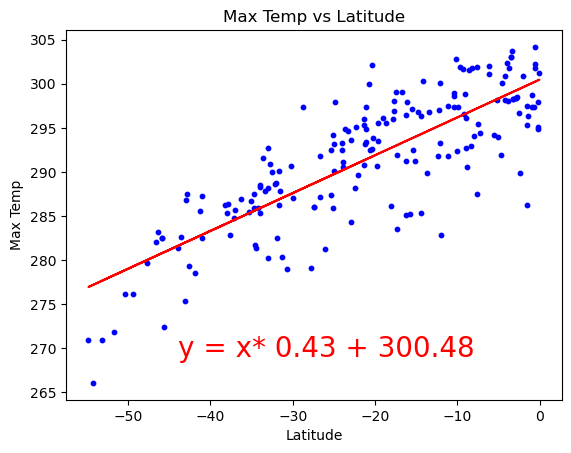

In [233]:
#Make 1st plot to base function off of

#Find correlation coefficient
correlation = st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
correlation = round(correlation[0],2)
print(f"The correlation coefficient is {correlation}")

#get regression info 
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept

#plot scatterplot and regression line
#plt.figure()
fig = southern_hemi_df.plot.scatter("Lat","Max Temp", s=10, c="blue",title="Max Temp vs Latitude",xlabel="Latitude")
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

#Adds regression equation to plot. Format slope and intercept to 2 decimals. Add location on figure and what to say
slope = '{0:.2f}'.format(slope)
intercept = '{0:.2f}'.format(intercept)
plt.figtext(0.3,0.2,f"y = x* {slope} + {intercept}", c="red",fontsize=20)
plt.show()

In [234]:
# Define a function to create Linear Regression plots
def regression(dataframe,x,y):
    #Find correlation coefficient
    correlation = st.pearsonr(dataframe[x], dataframe[y])
    correlation = round(correlation[0],2)
    print(f"The correlation coefficient is {correlation}")

    #get regression info 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(dataframe[x], dataframe[y])
    regress_values = dataframe[x] * slope + intercept

    #plot scatterplot and regression line
    #plt.figure()
    fig = dataframe.plot.scatter(x,y, s=10, c="blue",title=f"{y} vs {x}",xlabel="Latitude")
    plt.plot(dataframe[x],regress_values,"r-")

    #Adds regression equation to plot. Format slope and intercept to 2 decimals. Add location on figure and what to say
    slope = '{0:.2f}'.format(slope)
    intercept = '{0:.2f}'.format(intercept)
    plt.figtext(0.3,0.2,f"y = x* {slope} + {intercept}", c="red",fontsize=20)
    plt.show()
  

###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient is 0.81


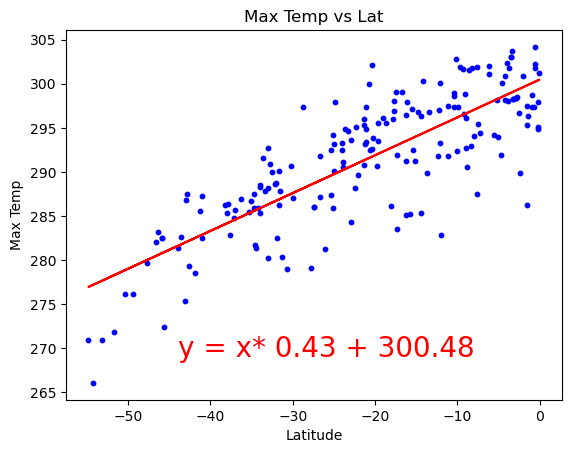

In [235]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df,"Lat","Max Temp")

The correlation coefficient is -0.59


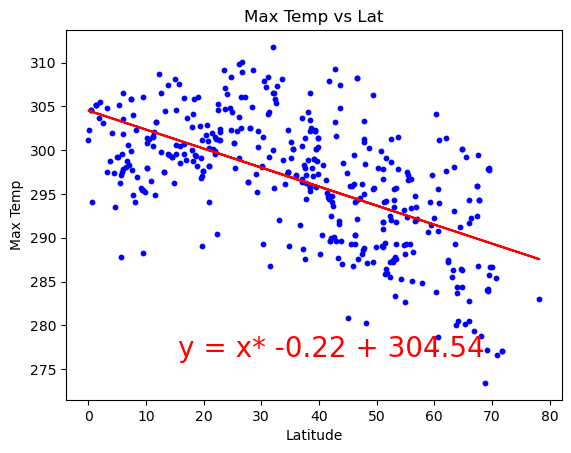

In [236]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df,"Lat","Max Temp")

**Discussion about the linear relationship:** There is a relationship between Max temperature and latitude as seen above. The closer the city is to about 20deg in latitude has the highest temperature. This peak latitude changes throughout the year due to Earth's tilt. A quadratic regression is best suited for this, not linear. Temps must be in Kelvin

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient is -0.09


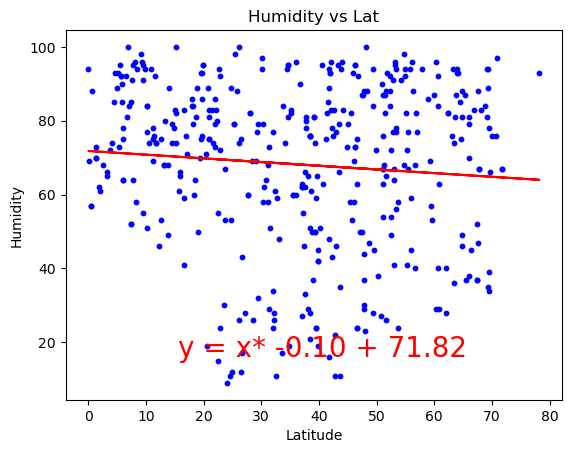

In [237]:
# Northern Hemisphere
regression(northern_hemi_df,"Lat","Humidity")

The correlation coefficient is -0.05


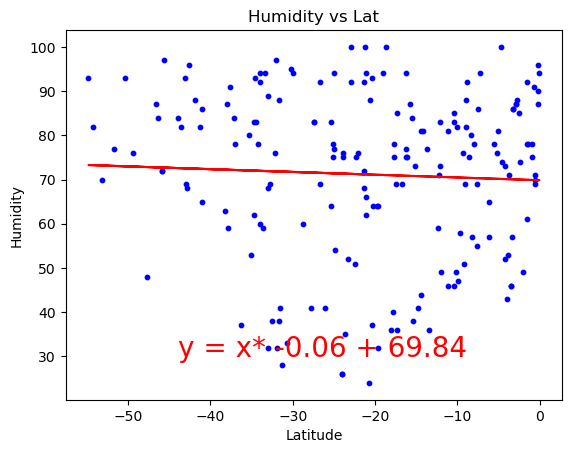

In [240]:
# Southern Hemisphere
regression(southern_hemi_df,"Lat","Humidity")

**Discussion about the linear relationship:** No correlation, R^2 is too low

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient is -0.13


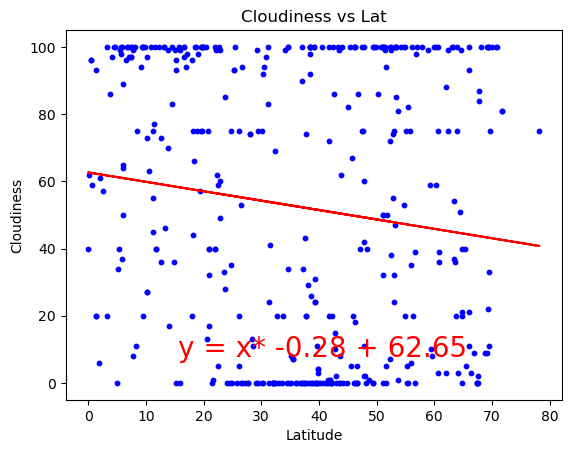

In [241]:
# Northern Hemisphere
regression(northern_hemi_df,"Lat","Cloudiness")

The correlation coefficient is -0.2


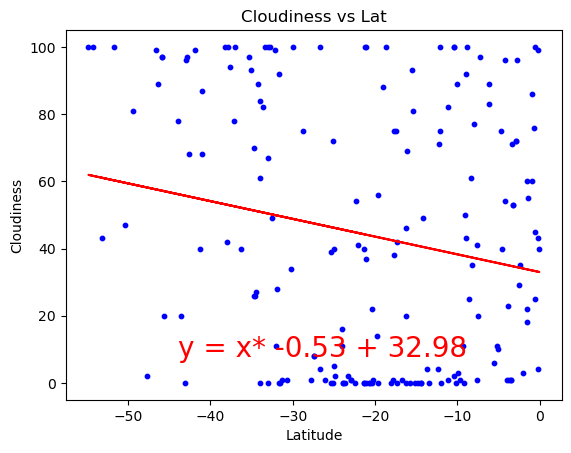

In [242]:
# Southern Hemisphere
regression(southern_hemi_df,"Lat","Cloudiness")

**Discussion about the linear relationship:** No correlation, R^2 is too low

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient is -0.19


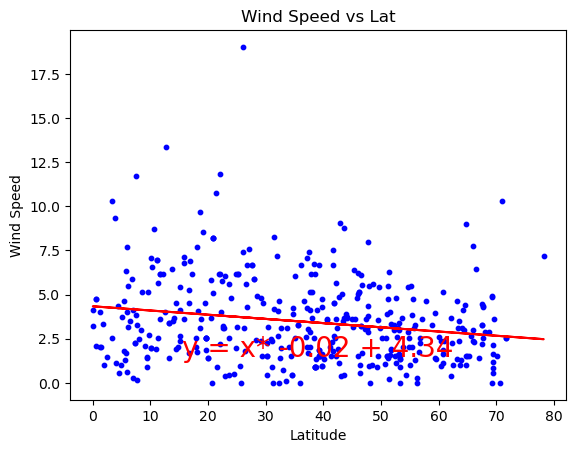

In [243]:
# Northern Hemisphere
regression(northern_hemi_df,"Lat","Wind Speed")

The correlation coefficient is -0.09


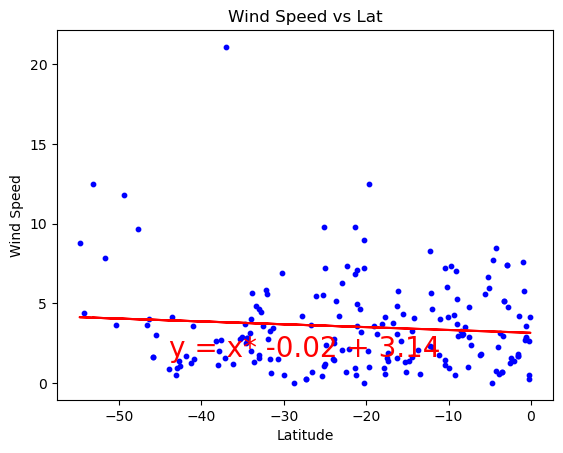

In [245]:
# Southern Hemisphere
regression(southern_hemi_df,"Lat","Wind Speed")

**Discussion about the linear relationship:** No correlation, R^2 is too low